In [1]:
# This pandas script analyzes data prepared by data_engineering.ipynb and database_engineering.ipynb; please see the
#    notebooks for these other modules for details.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#SQLalchemy Dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy.sql import func

## Climate Analysis and Exploration

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [4]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

# Print all of the classes mapped to the Base
Base.classes.keys()


['measurements', 'stations']

In [5]:
# Reflect the [measurements and stations] tables and save into classed called Measurements and Stations, respectively.
#
Measurements = Base.classes.measurements
Stations = Base.classes.stations

In [6]:
# Create a session
session = Session(engine)

In [7]:
# This query retrieves precipitation info for the last 12 months in the data set.
#
# Note: I used the avg() aggregation function in my query to calculate and return the average of all precipitation
#   data for a given date as there are multiple precipitation data points from various stations.
#
last12_data = session.query(Measurements.date, func.avg(Measurements.prcp)).\
              filter(Measurements.date.between('2016-08-24', '2017-08-23')).\
              group_by(Measurements.date).order_by(Measurements.date).all()
# Check the length of returned list to make sure we have data for one year (365 days)
len(last12_data)

365

In [8]:
# Convert the returned list Query objects to a dataframe for plotting
percip_df = pd.DataFrame(last12_data, columns = ['date', 'prcp'])[0:]
percip_df.head()

,date,prcp
0,2016-08-24,1.332857
1,2016-08-25,0.077143
2,2016-08-26,0.016667
3,2016-08-27,0.235000
4,2016-08-28,0.516667


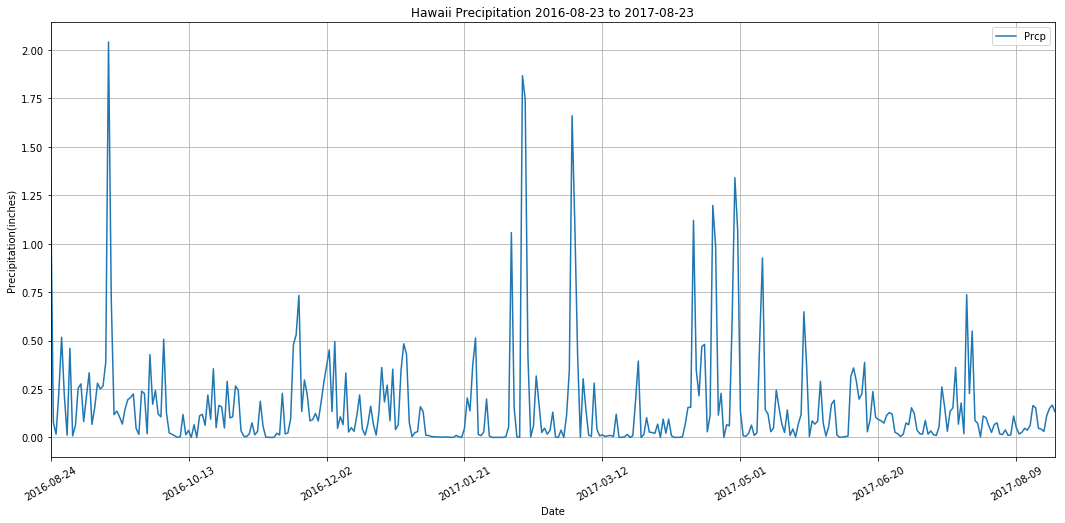

In [9]:
# I decided to plot prcipitation info as a line graph since it looks better than a bar chart
percip_df.plot(x='date', figsize = (18,8), rot = 30)
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Precipitation(inches)")
plt.title("Hawaii Precipitation 2016-08-23 to 2017-08-23")
plt.legend(["Prcp"])
plt.show()

In [10]:
# Using pandas describe() method to print summary statistics for precipitation data
percip_df.describe()

,prcp
count,365.000000
mean,0.164745
std,0.275553
min,0.000000
25%,0.015714
50%,0.071905
75%,0.191667
max,2.040571


## Station Analysis

In [11]:
# Since the instructions for this part of the exercise were not specific, I devised queries to claculate the total number
#   of stations for the last 12 months, as well as the entire data set.
#
total_stations_last12 = session.query(Measurements.date, Measurements.station).\
                        filter(Measurements.date>'2016-8-23').\
                        distinct(Measurements.station).group_by(Measurements.station).count()
total_stations_overall = session.query(Measurements.date, Measurements.station).\
                         distinct(Measurements.station).group_by(Measurements.station).count()

print('Total number of stations in the last 12 months: ', total_stations_last12, '\n' \
       'Total number of stations in all years: ', total_stations_overall)

Total number of stations in the last 12 months:  7 
Total number of stations in all years:  9


In [12]:
# Same as above, I devised two queries to find the most active station for both the past 12 months,
#   as well as the entire data set.
#
most_active_station12 = session.query(Measurements.station, func.count(Measurements.station)).\
                      filter(Measurements.date>'2016-8-23').group_by(Measurements.station).\
                      order_by(func.count(Measurements.station).desc()).first()
most_active_station_overall = session.query(Measurements.station, func.count(Measurements.station)).\
                      group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).first()

print('Most active station in the last 12 months:', most_active_station12[0], 'with', most_active_station12[1], 'observations.'\
      '\nMost active station overall:', most_active_station_overall[0], 'with', most_active_station_overall[1], 'observations.')

Most active station in the last 12 months: USC00519397 with 230 observations.
Most active station overall: USC00519281 with 2772 observations.


In [13]:
# And desgined queries that generate a list of stations and observations for the past 12 months, as well as entire data set.
# The lists are in descending order.
#
def print_station_data (msg, inlist):
    print (msg)
    for i in range(len(inlist)):
        print ('\t', inlist[i][0], inlist[i][1])

station_activities12 = session.query(Measurements.station, func.count(Measurements.station)).\
                       filter(Measurements.date>'2016-8-23').\
                       group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).all()
print_station_data ('Station observations for the last 12 months, in descending order:', station_activities12)

station_activities_overall = session.query(Measurements.station, func.count(Measurements.station)).\
                      group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).all()
print_station_data ('\nStation observations for all years, in descending order:', station_activities_overall)

Station observations for the last 12 months, in descending order:
	 USC00519397 230
	 USC00516128 222
	 USC00519281 221
	 USC00513117 212
	 USC00519523 210
	 USC00514830 195
	 USC00517948 107

Station observations for all years, in descending order:
	 USC00519281 2772
	 USC00519397 2724
	 USC00513117 2709
	 USC00519523 2669
	 USC00516128 2612
	 USC00514830 2202
	 USC00511918 1979
	 USC00517948 1372
	 USC00518838 511


In [14]:
most_active_station12 = station_activities12[0][0]
most_active_station = station_activities_overall[0][0]

print ('Most active station in the last 12 months: ', most_active_station12, \
       '\nMost active stations overall: ', most_active_station)

Most active station in the last 12 months:  USC00519397 
Most active stations overall:  USC00519281


In [15]:
last12_tobs = session.query(Measurements.date, Measurements.station, Measurements.tobs).\
               filter(Measurements.date.between('2016-08-24', '2017-08-23')).\
               group_by(Measurements.date).order_by(Measurements.date).all()

temps_df = pd.DataFrame(last12_tobs, columns = ['date', 'station', 'tobs'])[0:]
print ('\nDataFrame of temperature observations over the last 12 months, in ascending chronological order:')
temps_df.head()


DataFrame of temperature observations over the last 12 months, in ascending chronological order:


,date,station,tobs
0,2016-08-24,USC00516128,74
1,2016-08-25,USC00516128,77
2,2016-08-26,USC00519281,80
3,2016-08-27,USC00516128,74
4,2016-08-28,USC00516128,71


In [16]:
# This query returns temperature observations (tobs) for the most active station over the last 12 months.
#
highest_tobs_list = session.query(Measurements.tobs).filter(Measurements.date.between('2016-08-24', '2017-08-23')).\
                    filter(Measurements.station==most_active_station).all()
# prepare a list of all temperature observerations for the most active station
temperature_list = [x[0] for x in highest_tobs_list]

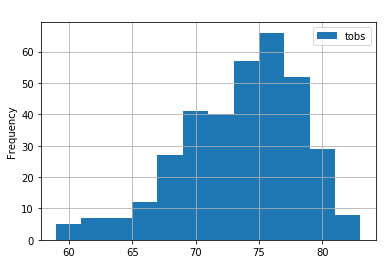

In [17]:
# Now present a bar graph of the temperature list for the most active station
plt.hist(temperature_list, bins=12)
plt.grid(True)
plt.xlabel(" ")
plt.ylabel("Frequency")
plt.title(" ")
plt.legend(["tobs"])
plt.show()

## Temperature Analysis

In [25]:
# The function below returns the minimum, average and maximum temperatures between the first date and the second
#    date passed in as input parameters.
#
# The format of input dates is assumed to be YYYY-MM-DD.
#
# Since the last year for which data are available is 2017, hard code the year for the queries to 2017.
#
def calc_temps (date1, date2):
    decon = date1.split('-')
    month1 = decon[1]
    day1 = decon[2]
    decon2 = date2.split('-')
    month2 = decon[1]
    day2 = decon[2]
    start_date = '2017-' + month1 + '-' + day1
    end_date = '2017-' + month2 + '-' + day2
    min_temp = session.query(func.min(Measurements.tobs)).\
               filter(Measurements.date.between(start_date, end_date)).first()
    avg_temp = session.query(func.avg(Measurements.tobs)).\
               filter(Measurements.date.between(start_date, end_date)).first()
    max_temp = session.query(func.max(Measurements.tobs)).\
               filter(Measurements.date.between(start_date, end_date)).first()
    return (min_temp[0], avg_temp[0], max_temp[0])

# Using the calc_temp function, find minimum, average and maximum temperatures for a planned trip in August 2018.
#
low, average, hi = calc_temps('2017-08-10', '2017-08-20')
print ('Minimum temperature during time period: ', low, \
       '; average temperature: ', average, '; max temperature: ',hi)

Minimum temperature during time period:  75 ; average temperature:  79.25 ; max temperature:  81


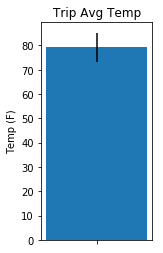

In [26]:
plt.figure(figsize=(2,4))
plt.bar('', average, 0.02, yerr=(hi-low))
plt.title('Trip Avg Temp')
plt.ylabel('Temp (F)')
plt.show()